In [1]:
# can be used to install SOM
import sys
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12042 sha256=10c20a9f14c4d18928c83a55e664b64e96d1ed377d5091ffb5315bceb149deb8
  Stored in directory: c:\users\ealje\appdata\local\pip\cache\wheels\0f\8c\a4\5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


## Imports

In [2]:
from minisom import MiniSom 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

## Import dataset

In [3]:
path = Path().cwd()

data_file = path / "zipdata.mat"
data = scipy.io.loadmat(data_file)

# scale data and get X and y
X = data['X']
y = data['y'].reshape(-1)

### 4) Try the SOM clustering method in the Zip data:

In [4]:
# documentation at https://github.com/JustGlowing/minisom
# size of grid is given first, 30,30
# Try changing this and see how it affects the map
# as well as the learning rate
som_shape = (30, 30)
# then we have features
som = MiniSom(som_shape[0], som_shape[1], 256, sigma=4, learning_rate=0.5)
som.pca_weights_init(X)
som.train_random(X, 5000, verbose=True)

c:\Users\ealje\AppData\Local\anaconda3\Lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 5.461384420900994


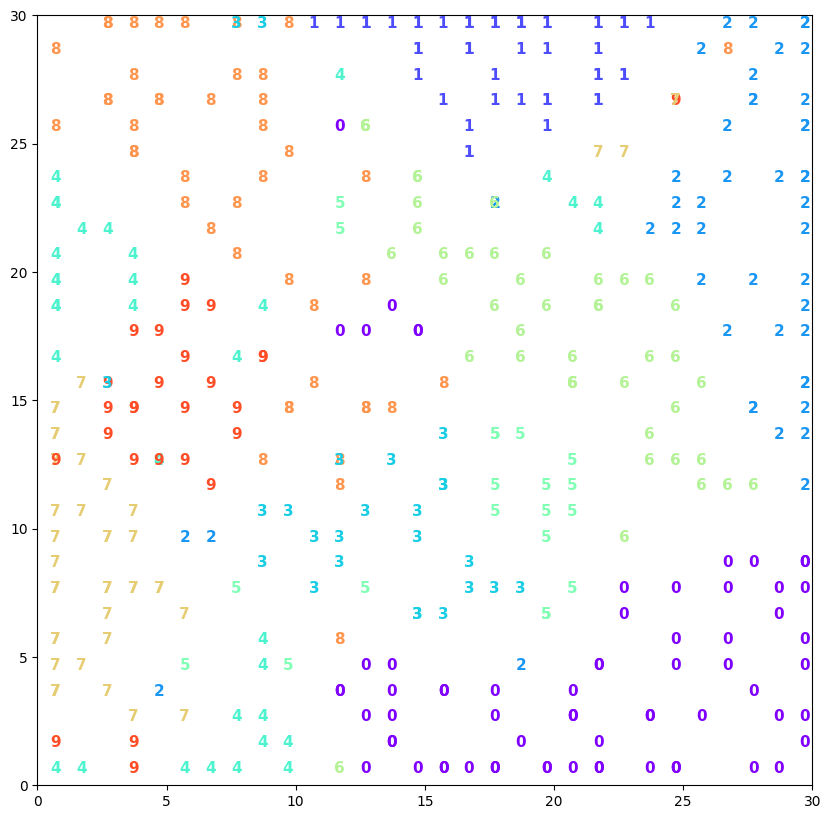

In [8]:
# let us first plot the mapping that is created with SOM
plt.figure(figsize=(10, 10))
for x, target in zip(X, y):  # scatterplot
    w = som.winner(x)
    plt. text(w[0]+.5,  w[1]+.5,  str(target),
              color=plt.cm.rainbow(target / 10.), fontdict={'weight': 'bold',  'size': 11})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

## Clustering

In [9]:
# Initialization and training
som_shape = (4, 4)
som = MiniSom(som_shape[0], som_shape[1], 256)

som.pca_weights_init(X)
som.train_batch(X, 5000, verbose=False)

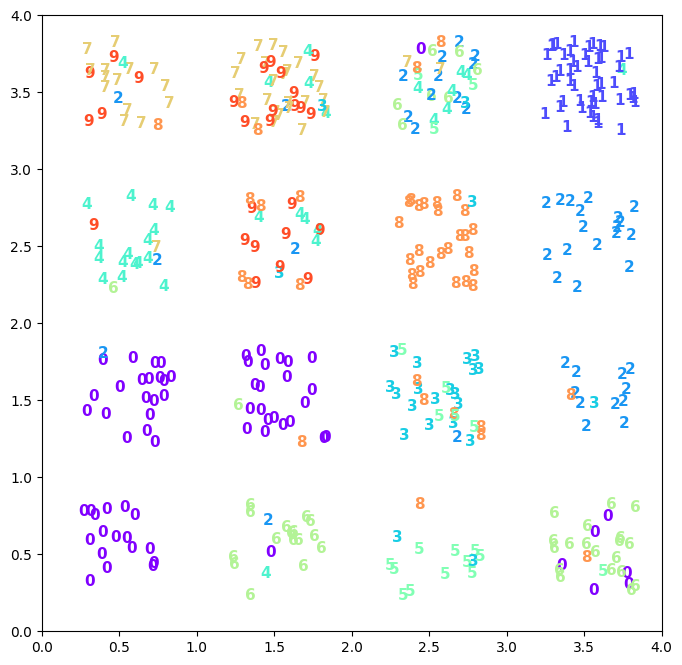

In [10]:
plt.figure(figsize=(8, 8))
for x, t in zip(X, y):  # scatterplot    
    w = som.winner(x)
    xval = w[0]+.5+0.6*np.random.rand(1)-0.3
    yval = w[1]+.5+0.6*np.random.rand(1)-0.3
    plt.text(xval, yval,  str(t), color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

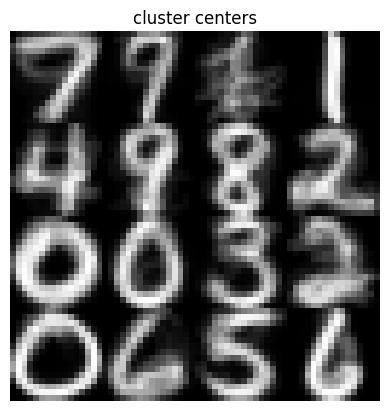

In [11]:
# Lets print the cluster centers
f, ax = plt.subplots()
centroids = som.get_weights()
# Inputs
ax.set_title('cluster centers')
ax.axis('off')

rows = 4
columns = 4

canvas = np.zeros((16*rows, columns*16))
for i in range(rows):
    for j in range(columns):
        canvas[(rows-i-1)*16:(rows-i)*16, j*16:(j+1)*16] = centroids[j][i][:].reshape((16, 16))
ax.imshow(canvas, cmap='gray')
plt.show()

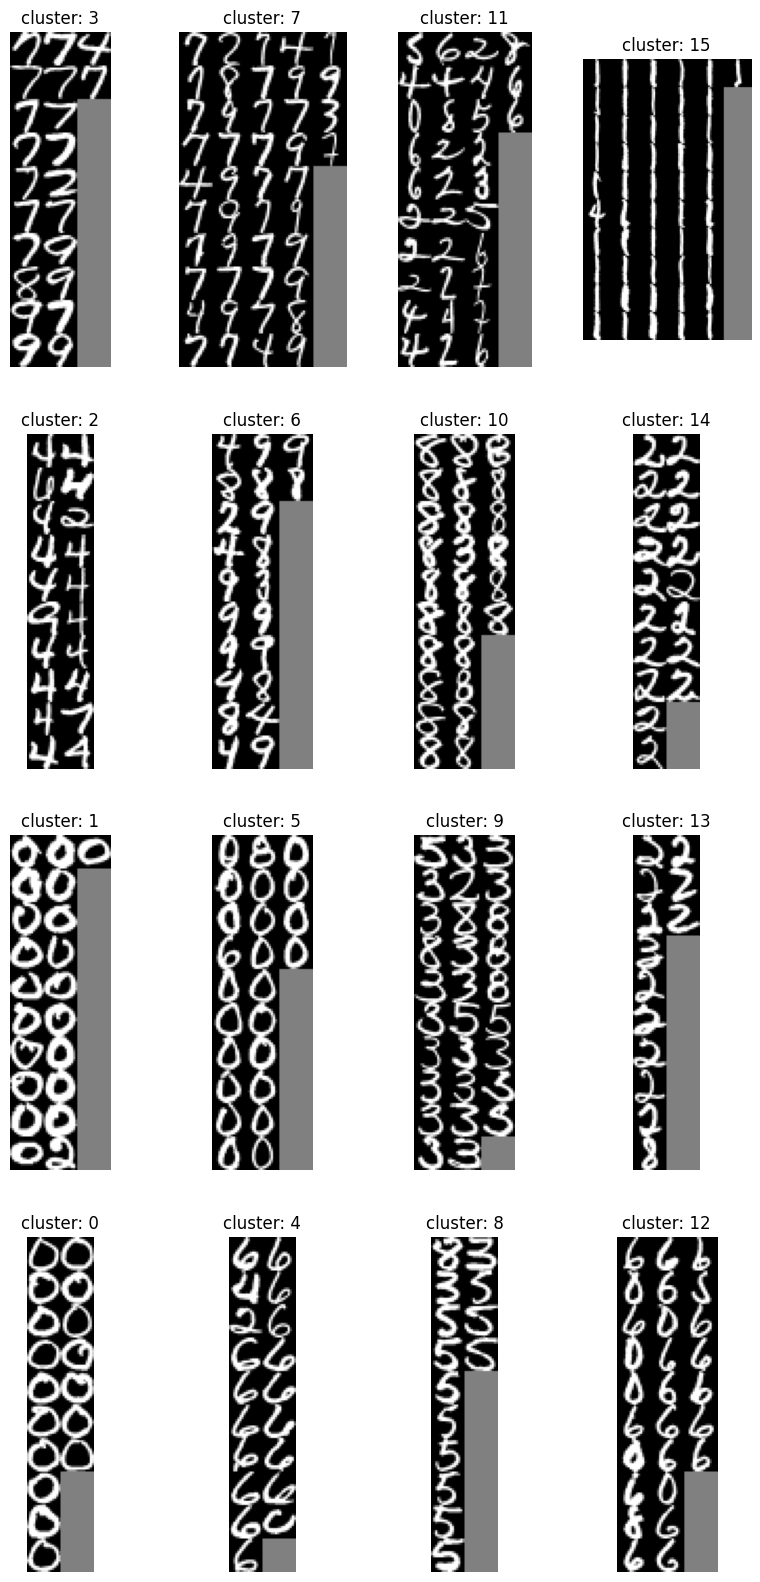

In [12]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# let us print the clusterings of the digits
f, axarr = plt.subplots(4,4, figsize=(10,20))

num_clusters = 16
cluster_pr_row = num_clusters // 4
cluster_num=0
for col in range(4):
    for cluster_center in range(cluster_pr_row):
        ax=axarr[3-cluster_center,col]
        obs_in_cluster = X[cluster_index == cluster_num]
        n, p = obs_in_cluster.shape
        rows = 10
        columns = int(np.ceil(n / rows))
            

        canvas = np.zeros((16*rows, columns*16))
        for idx in range(n):
            i = idx % rows
            j = idx // rows
            canvas[i*16:i*16+16, j*16:j*16+16] = obs_in_cluster[idx].reshape((16, 16))
        ax.imshow(canvas, cmap='gray')
        
        ax.set_title(f'cluster: {cluster_num}')
        cluster_num+=1
        ax.axis('off')

plt.show()